### let's first import the "ProjectData.xlsx" file and see what it contains.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Elec_data = pd.read_excel(r'C:\Excel files\ProjectData.xlsx')
Elec_data.head()

,User_Id,Product_Name,Brand_Name,Price,Rating,Reviews
0,683435088,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...
1,683435089,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu..."
2,683435090,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased
3,683435091,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...
4,683435092,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...


In [3]:
Elec_data.shape

(999, 6)

In [4]:
#Check the datatype
Elec_data.dtypes

User_Id           int64
Product_Name     object
Brand_Name       object
Price           float64
Rating            int64
Reviews          object
dtype: object

In [5]:
Elec_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User_Id       999 non-null    int64  
 1   Product_Name  999 non-null    object 
 2   Brand_Name    999 non-null    object 
 3   Price         999 non-null    float64
 4   Rating        999 non-null    int64  
 5   Reviews       999 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [6]:
Elec_data.describe()['Rating']

count    999.000000
mean       3.724725
std        1.562107
min        1.000000
25%        2.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64

In [7]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(Elec_data.Rating.min()))
print('Maximum rating is: %d' %(Elec_data.Rating.max()))

Minimum rating is: 1
Maximum rating is: 5


### Now let's take a look at the average rating of each Brand.

In [8]:
Elec_data.groupby('Brand_Name')['Rating'].mean().head()

Brand_Name
Apple                      3.650602
BlackBerry                 3.989691
Cedar Tree Technologies    2.000000
HTM                        4.029412
Huawei                     4.320755
Name: Rating, dtype: float64

### You can see that the average ratings are not sorted. so,we sort the ratings in the descending order.

In [9]:
rating_mean= Elec_data.groupby('Brand_Name')['Rating'].mean().sort_values(ascending=False)
rating_mean.head()

Brand_Name
Phone Baby    5.000000
Motorola      4.678571
Huawei        4.320755
OtterBox      4.233333
Nokia         4.205479
Name: Rating, dtype: float64

### A product brand can make it to the top of the above list even if only a single user has given it five stars. Therefore, the above stats can be misleading. Normally, a product brand which is really a good one gets a higher rating by a large number of users.


###  Now we plot the total number of ratings for a product brand

In [10]:
rating_count= Elec_data.groupby('Brand_Name')['Rating'].count().sort_values(ascending=False)
rating_count.head()

Brand_Name
Lenovo        163
Jethro        117
BlackBerry     97
LG             93
Ulefone        83
Name: Rating, dtype: int64

### Unique Users and products

In [11]:
print("Total data ")
print("\nTotal no of ratings :",Elec_data.shape[0])
print("Total No of Users   :", len(pd.unique(Elec_data.User_Id)))
print("Total No of products  :", len(pd.unique(Elec_data.Brand_Name)))

Total data 

Total no of ratings : 999
Total No of Users   : 200
Total No of products  : 17


### we know that both the average rating per brand and the number of ratings per brand are important attributes. 

### Create a new dataframe that contains both of these attributes.

In [12]:
ratings_mean_count = pd.DataFrame(Elec_data.groupby('Brand_Name')['Rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(Elec_data.groupby('Brand_Name')['Rating'].count())
ratings_mean_count.head()

,Rating,rating_counts
Brand_Name,,
Apple,3.650602,83
BlackBerry,3.989691,97
Cedar Tree Technologies,2.000000,4
HTM,4.029412,34
Huawei,4.320755,53


In [13]:
rating_counts = ratings_mean_count.iloc[:,1].values
rating_counts

array([ 83,  97,   4,  34,  53,   4, 117,  93, 163,  28,  73,  30,   3,
        37,  80,  83,  17], dtype=int64)

In [14]:
Rating = ratings_mean_count.iloc[:,0].values
Rating

array([3.65060241, 3.98969072, 2.        , 4.02941176, 4.32075472,
       2.        , 3.58974359, 3.27956989, 4.12883436, 4.67857143,
       4.20547945, 4.23333333, 5.        , 3.7027027 , 3.05      ,
       2.89156627, 2.94117647])

### We know that brand with a higher number of ratings usually have a high average rating as well since a good brand is normally well-known and a well-known brand is purchase by a large number of people, and thus usually has a higher rating.

### We will plot average ratings against the number of ratings.

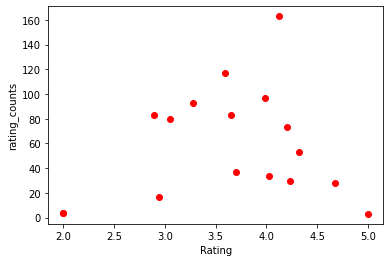

In [15]:
plt.xlabel('Rating')
plt.ylabel('rating_counts')
plt.scatter(Rating,rating_counts,color = 'red')
plt.show()

### Let's plot a histogram for the number of rating in descending order represented by the rating counts

<AxesSubplot:xlabel='Brand_Name'>

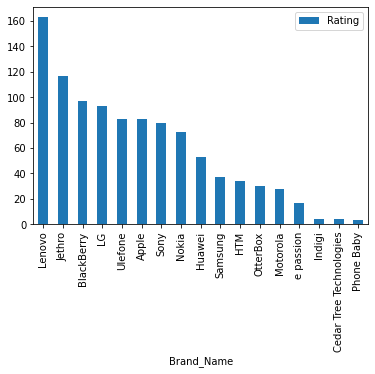

In [16]:
popular_products = pd.DataFrame(Elec_data.groupby('Brand_Name')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(30).plot(kind = "bar")

### We spent quite a bit of time on visualizing and preprocessing our data. Now is the time to find the similarity between products.

### We will use the correlation between the ratings of a product as the similarity metric. To find the correlation between the ratings of the product, we need to create a matrix where each column is a product name and each row contains the rating assigned by a specific user to that product

In [17]:
user_brand_rating = Elec_data.pivot_table(index='User_Id', columns='Brand_Name', values='Rating',fill_value=0)
user_brand_rating.head()

Brand_Name,Apple,BlackBerry,Cedar Tree Technologies,HTM,Huawei,Indigi,Jethro,LG,Lenovo,Motorola,Nokia,OtterBox,Phone Baby,Samsung,Sony,Ulefone,e passion
User_Id,,,,,,,,,,,,,,,,,
683435088,0.0,0,0,0,0,0,3.0,5.0,0.0,0,5,0,0,5,0,0,0
683435089,0.0,0,0,0,0,0,5.0,3.0,0.0,0,5,0,0,4,0,0,0
683435090,0.0,0,0,0,0,0,5.0,3.0,0.0,0,3,0,0,5,0,0,0
683435091,0.0,0,0,0,0,0,5.0,5.0,0.0,0,5,0,0,4,0,0,0
683435092,0.0,0,0,0,0,0,5.0,3.0,0.0,0,4,0,0,4,0,0,0


### Assuming the customer search for Product "jethro"

In [18]:
Jethro_ratings = user_brand_rating['Jethro']
Jethro_ratings.head()

User_Id
683435088    3.0
683435089    5.0
683435090    5.0
683435091    5.0
683435092    5.0
Name: Jethro, dtype: float64

### Finding the correlation between jethro and all other brands

In [19]:
brand_like_jethro = user_brand_rating.corrwith(Jethro_ratings,axis=0,drop=False,method='pearson')
brand_like_jethro.head()

Brand_Name
Apple                     -0.429777
BlackBerry                -0.014784
Cedar Tree Technologies    0.084185
HTM                        0.361630
Huawei                     0.399466
dtype: float64

In [20]:
corr_jethro = pd.DataFrame(brand_like_jethro, columns=['Correlation'])
corr_jethro.dropna(inplace=True)
corr_jethro.head()

,Correlation
Brand_Name,
Apple,-0.429777
BlackBerry,-0.014784
Cedar Tree Technologies,0.084185
HTM,0.361630
Huawei,0.399466


### Let's sort the product  in descending order of correlation to see highly correlated product at the top.

In [21]:
corr_jethro.sort_values('Correlation', ascending=False).head()

,Correlation
Brand_Name,
Jethro,1.000000
Nokia,0.611878
Huawei,0.399466
OtterBox,0.369417
Samsung,0.364072


In [22]:
corr_jethro = corr_jethro.join(ratings_mean_count['rating_counts'])
corr_jethro.head()

,Correlation,rating_counts
Brand_Name,,
Apple,-0.429777,83
BlackBerry,-0.014784,97
Cedar Tree Technologies,0.084185,4
HTM,0.361630,34
Huawei,0.399466,53


### Recommending top highly correlated products with rating count greater than 50

In [23]:
corr_jethro[corr_jethro ['rating_counts']>50].sort_values('Correlation', ascending=False).head()

,Correlation,rating_counts
Brand_Name,,
Jethro,1.000000,117
Nokia,0.611878,73
Huawei,0.399466,53
Sony,0.347884,80
BlackBerry,-0.014784,97


### Here are the top products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.

In [26]:
Lenovo_ratings = user_brand_rating['Lenovo']
Lenovo_ratings.head()

User_Id
683435088    0.0
683435089    0.0
683435090    0.0
683435091    0.0
683435092    0.0
Name: Lenovo, dtype: float64

In [27]:
brand_like_Lenovo = user_brand_rating.corrwith(Lenovo_ratings,axis=0,drop=False,method='pearson')
brand_like_Lenovo.head()

Brand_Name
Apple                      0.435434
BlackBerry                 0.086862
Cedar Tree Technologies   -0.118554
HTM                       -0.395286
Huawei                    -0.421819
dtype: float64

In [32]:
corr_Lenovo = pd.DataFrame(brand_like_Lenovo, columns=['Correlation'])
corr_Lenovo.dropna(inplace=True)
corr_Lenovo.head()

,Correlation
Brand_Name,
Apple,0.435434
BlackBerry,0.086862
Cedar Tree Technologies,-0.118554
HTM,-0.395286
Huawei,-0.421819


In [33]:
corr_Lenovo.sort_values('Correlation', ascending=False).head()

,Correlation
Brand_Name,
Lenovo,1.000000
Ulefone,0.601293
Apple,0.435434
Motorola,0.387328
LG,0.270048


In [34]:
corr_Lenovo = corr_Lenovo.join(ratings_mean_count['rating_counts'])
corr_Lenovo.head()

,Correlation,rating_counts
Brand_Name,,
Apple,0.435434,83
BlackBerry,0.086862,97
Cedar Tree Technologies,-0.118554,4
HTM,-0.395286,34
Huawei,-0.421819,53


In [35]:
corr_Lenovo[corr_Lenovo ['rating_counts']>50].sort_values('Correlation', ascending=False).head()

,Correlation,rating_counts
Brand_Name,,
Lenovo,1.000000,163
Ulefone,0.601293,83
Apple,0.435434,83
LG,0.270048,93
BlackBerry,0.086862,97
